In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:

df1=pd.DataFrame({'X':[19,7,11], 'Y':[42,15,23]})
                  
df2=pd.DataFrame({'X':[20,9,12], 'Y':[18,16,21]})

euclidean_distances = np.sqrt((df1['X'] - df2['X'])**2 + (df1['Y'] - df2['Y'])**2)
print(euclidean_distances.values)
                  

[24.0208243   2.23606798  2.23606798]


In [10]:
Chaplin=pd.DataFrame({'Movies': ['Dune 2', 'Moana 2','Lola & Stitch']})
Kinopark=pd.DataFrame({'Movies':['Lola & Stitch', 'Fantastic four','Moana 2']})
A = set(Chaplin['Movies'])
B = set(Kinopark['Movies'])

# Compute Jaccard similarity
jaccard = len(A & B) / len(A | B)
print("Jaccard similarity:", jaccard)

Jaccard similarity: 0.5


In [18]:
A=np.array([2,5,9,14,3,10])
B=np.array([1,6,3,13,18,9])
dot_product=np.dot(A,B)
magnitude1=norm(A)
magnitude2=norm(B)
cosine=dot_product/(magnitude1*magnitude2)
correlation=np.corrcoef(A,B)[0,1]
print('Cosine similarity:', cosine)
print('Correlation:',correlation)

Cosine similarity: 0.7589983580869605
Correlation: 0.18093019554218845


Euclidean distance is just the straight-line distance between two points. Works on numeric data, The smaller the distance → the more similar the points are.
Jaccard similarity - a measure of similarity between two sets. Used when comparing sets or categorical data
Cosine similarity - helpful in determining, how similar the data objects are irrespective of their size and how similar the direction Smaller the angle, higher the similarity.
Correlation - How well two things follow the same trend

task 1 - Measures straight-line distance between two numeric points. Smaller = more similar
task 2 - Shows how many items overlap between two sets
task 3 - A value close to 1 means both data objects follow a somewhat similar pattern, even if their magnitudes differ
task 4 - Measures how well two variables increase or decrease together. Weak positive correlation → both variables slightly increase together, but not consistently.

In [4]:
#task 2
data=pd.read_csv('global_pop.csv')


In [6]:
data.head(5)

,Country,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
0,Afghanistan,42.9,3.9,65.7,42.65,21.12,21.53,102.0
1,Albania,16.8,23.5,101.9,2.79,1.41,1.38,97.8
2,Algeria,30.3,10.0,19.7,46.81,22.94,23.87,104.1
3,Andorra,11.9,23.2,174.3,0.08,0.04,0.04,104.6
4,Angola,44.4,4.6,30.4,37.89,19.14,18.75,98.0


In [268]:
data.dropna()

,Country,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
0,Afghanistan,42.9,3.9,65.7,42.65,21.12,21.53,102.0
1,Albania,16.8,23.5,101.9,2.79,1.41,1.38,97.8
2,Algeria,30.3,10.0,19.7,46.81,22.94,23.87,104.1
3,Andorra,11.9,23.2,174.3,0.08,0.04,0.04,104.6
4,Angola,44.4,4.6,30.4,37.89,19.14,18.75,98.0
...,...,...,...,...,...,...,...,...
187,Venezuela,25.5,14.3,31.0,28.41,14.37,14.03,97.6
188,Vietnam,23.2,13.9,322.2,100.99,51.53,49.46,96.0
189,Yemen,41.1,4.0,76.9,40.58,20.03,20.56,102.7
190,Zambia,41.5,3.3,28.7,21.32,10.76,10.55,98.0


In [8]:
numeric_col=data.select_dtypes(include=["number"]).columns.tolist()
print("Numeric columns:", numeric_col)

Numeric columns: ['Population Aged 0 to 14 (%)', 'Population Aged 60 and Over (%)', 'Population density', 'Population(in millions)', 'Female Population(in millions)', 'Male Population(in millions)', 'Sex ratio (males per 100 females)']


In [10]:
data2=data[numeric_col].copy()

In [12]:
data2.isna().sum()

Population Aged 0 to 14 (%)          0
Population Aged 60 and Over (%)      0
Population density                   0
Population(in millions)              0
Female Population(in millions)       0
Male Population(in millions)         0
Sex ratio (males per 100 females)    0
dtype: int64

In [14]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data2)
data_mean = np.mean(data2.values)
data_std = np.std(data2.values)
sc_mean=np.mean(data_scaled)
sc_std=np.std(data_scaled)

In [16]:
summary = pd.DataFrame({
    "Method": ["Original", "Standardized"],
    "Mean": [
        data_mean,
        sc_mean
    ],
    "Std Dev": [
        data_std,
        sc_std
    ]
})

summary

,Method,Mean,Std Dev
0,Original,8.204706e+01,754.337969
1,Standardized,-1.797504e-16,1.000000


After scaling, the data is centered around zero.
Before standardization, the dataset had large variations in scale, with mean ≈ 38,000 and standard deviation ≈ 42,000. This indicates that the numeric features were measured in large, non-comparable units. After applying StandardScaler(), the data was transformed so that each feature has a mean of approximately 0 and a standard deviation of 1

In [18]:
cov_matrix=np.cov(data_scaled.T)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 1.00523560e+00 -8.60825491e-01 -1.38483057e-01 -4.23710189e-02
  -4.31732255e-02 -4.15907590e-02 -6.37162124e-02]
 [-8.60825491e-01  1.00523560e+00  2.38089310e-01  9.22721759e-03
   1.14345711e-02  7.10933666e-03 -2.80599647e-01]
 [-1.38483057e-01  2.38089310e-01  1.00523560e+00 -1.62773060e-02
  -1.67739758e-02 -1.58001995e-02  2.49119236e-02]
 [-4.23710189e-02  9.22721759e-03 -1.62773060e-02  1.00523560e+00
   1.00514081e+00  1.00514915e+00  3.14385605e-03]
 [-4.31732255e-02  1.14345711e-02 -1.67739758e-02  1.00514081e+00
   1.00523560e+00  1.00487332e+00 -6.68264571e-04]
 [-4.15907590e-02  7.10933666e-03 -1.58001995e-02  1.00514915e+00
   1.00487332e+00  1.00523560e+00  6.79068831e-03]
 [-6.37162124e-02 -2.80599647e-01  2.49119236e-02  3.14385605e-03
  -6.68264571e-04  6.79068831e-03  1.00523560e+00]]


Covariance matrix shows that YearsExperience and Salary increase together almost perfectly

In [20]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eig_vals)
print("Eigenvectors:")
print(eig_vecs)

Eigenvalues: [3.01949349e+00 1.96176619e+00 1.06354021e+00 9.19654806e-01
 7.18637254e-02 3.30782484e-04 7.45576545e-10]
Eigenvectors:
[[-4.75719756e-02  6.49409595e-01 -1.85688080e-01  3.35581968e-01
   6.54910579e-01 -9.47703725e-04 -2.53794453e-06]
 [ 2.73600320e-02 -6.94567264e-01 -1.13136631e-01 -8.91559065e-02
   7.04322795e-01 -2.91058912e-03  6.65604470e-07]
 [-7.47313098e-03 -2.64308305e-01  3.67084333e-01  8.87356205e-01
  -8.90619934e-02  1.13636544e-03 -4.39741944e-07]
 [ 5.76498233e-01  2.77067753e-02 -1.81310756e-03  1.45169257e-02
   6.43052865e-03 -1.08999756e-02 -8.16399370e-01]
 [ 5.76479128e-01  2.64234495e-02 -5.32169453e-03  1.47799309e-02
   7.62361876e-03  7.12480741e-01  3.98798099e-01]
 [ 5.76414804e-01  2.89331493e-02  1.54338381e-03  1.42641255e-02
   5.29491422e-03 -7.01585931e-01  4.17674687e-01]
 [ 2.52778395e-04  1.53888340e-01  9.04397668e-01 -3.02328099e-01
   2.58770146e-01  4.34791581e-03 -3.10162815e-06]]


In [22]:
sorted_indices=np.argsort(eig_vals)[::-1]
eig_vals_sorted=eig_vals[sorted_indices]
eig_vecs_sorted=eig_vecs[:, sorted_indices]

print("Sorted Eigenvalues:", eig_vals_sorted)
print("Sorted Eigenvectors:", eig_vecs_sorted)

Sorted Eigenvalues: [3.01949349e+00 1.96176619e+00 1.06354021e+00 9.19654806e-01
 7.18637254e-02 3.30782484e-04 7.45576545e-10]
Sorted Eigenvectors: [[-4.75719756e-02  6.49409595e-01 -1.85688080e-01  3.35581968e-01
   6.54910579e-01 -9.47703725e-04 -2.53794453e-06]
 [ 2.73600320e-02 -6.94567264e-01 -1.13136631e-01 -8.91559065e-02
   7.04322795e-01 -2.91058912e-03  6.65604470e-07]
 [-7.47313098e-03 -2.64308305e-01  3.67084333e-01  8.87356205e-01
  -8.90619934e-02  1.13636544e-03 -4.39741944e-07]
 [ 5.76498233e-01  2.77067753e-02 -1.81310756e-03  1.45169257e-02
   6.43052865e-03 -1.08999756e-02 -8.16399370e-01]
 [ 5.76479128e-01  2.64234495e-02 -5.32169453e-03  1.47799309e-02
   7.62361876e-03  7.12480741e-01  3.98798099e-01]
 [ 5.76414804e-01  2.89331493e-02  1.54338381e-03  1.42641255e-02
   5.29491422e-03 -7.01585931e-01  4.17674687e-01]
 [ 2.52778395e-04  1.53888340e-01  9.04397668e-01 -3.02328099e-01
   2.58770146e-01  4.34791581e-03 -3.10162815e-06]]


Eigenvectors tell us where the data varies the most,
Eigenvalues tell us how much it varies there,
and we sort them so PCA can focus on the most important patterns first.

In [24]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_scaled)
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))
print("Total variance explained:", sum(pca.explained_variance_ratio_))
print("PCA components:")
print(pca.components_)


Explained variance ratio: 0.7079022323800002
Total variance explained: 0.7079022323800002
PCA components:
[[-4.75719756e-02  2.73600320e-02 -7.47313098e-03  5.76498233e-01
   5.76479128e-01  5.76414804e-01  2.52778395e-04]
 [-6.49409595e-01  6.94567264e-01  2.64308305e-01 -2.77067753e-02
  -2.64234495e-02 -2.89331493e-02 -1.53888340e-01]]


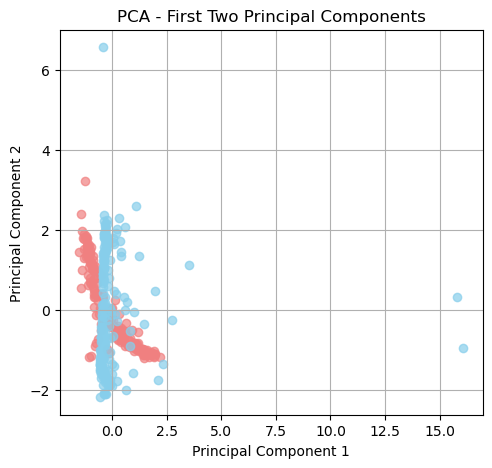

In [288]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], color='lightcoral', alpha=0.7)
plt.xlabel(numeric_col[0])
plt.ylabel(numeric_col[1])
plt.title('Before PCA (Original Scaled Features)')
plt.grid(True)

plt.scatter(data_pca[:,0], data_pca[:,1], color='skyblue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()

After standardizing the population dataset, PCA was applied to reduce it to two components.
The scatter plot of the first two principal components shows that most data points are concentrated in a narrow region, suggesting that the dataset is dominated by one main pattern (PC1).
This means most features (like total population, male and female counts) vary together, while PC2 captures smaller variations

In [290]:
data3=pd.read_csv('Classification.csv')

In [292]:
data3.head()

,age,income,will_buy
0,25,30000,0
1,35,40000,1
2,45,60000,1
3,30,35000,0
4,50,80000,1


In [393]:
x=data3[['income']]
y=data3['will_buy']

In [395]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [397]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [399]:
model = LogisticRegression() #The model looks at this data and learns the pattern, how “income” affects the chance of buying
model.fit(x_train_scale, y_train)
y_pred = model.predict(x_test_scale)
log_acc = accuracy_score(y_test, y_pred)

In [403]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}") # accuracy_score() checks how many predictions were correct out of total ones.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) #Confusion matrix shows how the model performed in detail
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.95
Confusion Matrix:
 [[ 7  0]
 [ 1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [421]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scale, y_train)
knn_pred = knn_model.predict(x_test_scale)
knn_acc=accuracy_score(y_test, knn_pred)

In [423]:
#task 3
decisionTree_model=DecisionTreeClassifier(random_state=42)
decisionTree_model.fit(x_train, y_train)
decisionPredict=decisionTree_model.predict(x_test)
tree_acc=accuracy_score(y_test, decisionPredict)

In [417]:
svm_model=SVC(kernel='linear')
svm_model.fit(x_train_scale, y_train)
svm_pred = svm_model.predict(x_test_scale)
svm_acc = accuracy_score(y_test, svm_pred)

In [429]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'kNN', 'Decision Tree', 'SVM'],
    'Accuracy': [log_acc, knn_acc, tree_acc, svm_acc]
})

print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression      0.95
1                  kNN      0.95
2        Decision Tree      0.95
3                  SVM      0.95


logistic regression - Finds a line (or curve) that best separates buyers and non-buyers based on income.
knn neighbors - looks at the k closest data points to decide — “if most neighbors bought, this person probably will too.”
Decision Tree - Splits data into groups (“Income > 50k → buy”, otherwise not)
SVM - Finds the best boundary (line) that separates buyers and non-buyers with the largest margin.